In [191]:
'''
MUSHROOM CLASSIFICATION
Created by: Andrew Nguyen

This notebook was created with python3 under Windows OS.
'''

'\nMUSHROOM CLASSIFICATION\nCreated by: Andrew Nguyen\n\nThis notebook was created with python3 under Windows OS.\n'

In [192]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
%matplotlib inline

In [193]:
data = pd.read_csv("data_csvs/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [195]:
# in order to better understand data during EDA, we should convert letter values to full words
cap_shape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(cap_shape)

cap_surface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(cap_surface)

cap_color={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(cap_color)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(odor)

gill_attachment={"a":"attached","f":"free", "d":"descending", "n":"notched"}
data["gill-attachment"]=data["gill-attachment"].replace(gill_attachment)

gill_spacing={"c":"close","w":"crowded", "d":"distant"}
data["gill-spacing"]=data["gill-spacing"].replace(gill_spacing)

gill_size={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(gill_size)

gill_color={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(gill_color)

stalk_shape={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(stalk_shape)

stalk_root={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(stalk_root)

stalk_surface_above_ring={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(stalk_surface_above_ring)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(stalk_surface_above_ring)

stalk_color_above_ring={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(stalk_color_above_ring)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(stalk_color_above_ring)

veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)

veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)

ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)

ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)

spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

classification={"e":"edible","p":"poisonous"}
data["class"]=data["class"].replace(classification)

print(data.iloc[1].values)

['edible' 'convex' 'smooth' 'yellow' 'bruises' 'almond' 'free' 'close'
 'broad' 'black' 'enlarging' 'club' 'smooth' 'smooth' 'white' 'white'
 'partial' 'white' 'one' 'pendant' 'brown' 'numerous' 'grasses']


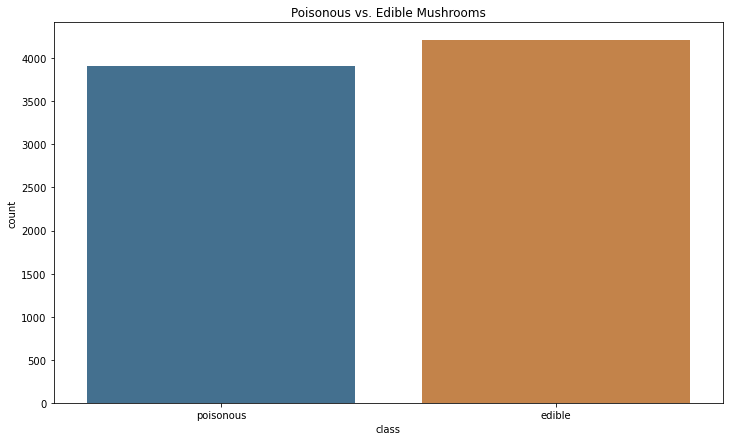

In [196]:
plt.figure(figsize=(12,7))
class_plt = sns.countplot(x = 'class', data = data, saturation = 0.5).set(title="Poisonous vs. Edible Mushrooms")

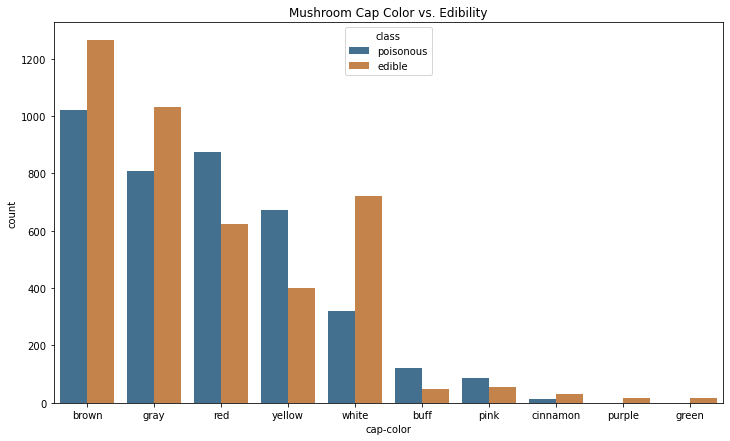

In [197]:
plt.figure(figsize=(12,7))
color_class_plt = sns.countplot(x = 'cap-color', data = data, hue = 'class', order = data['cap-color'].value_counts().index, saturation = 0.5).set(title = "Mushroom Cap Color vs. Edibility")

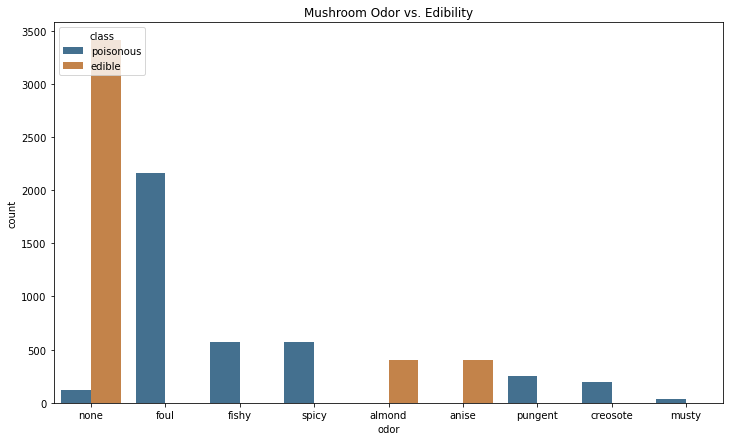

In [198]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'odor', data = data, hue = 'class', order = data['odor'].value_counts().index, saturation = 0.5).set(title = "Mushroom Odor vs. Edibility")

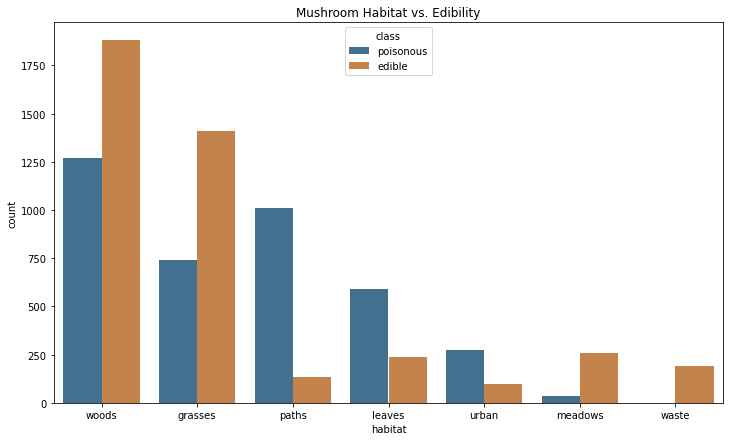

In [199]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'habitat', data = data, hue = 'class', order = data['habitat'].value_counts().index, saturation = 0.5).set(title = "Mushroom Habitat vs. Edibility")

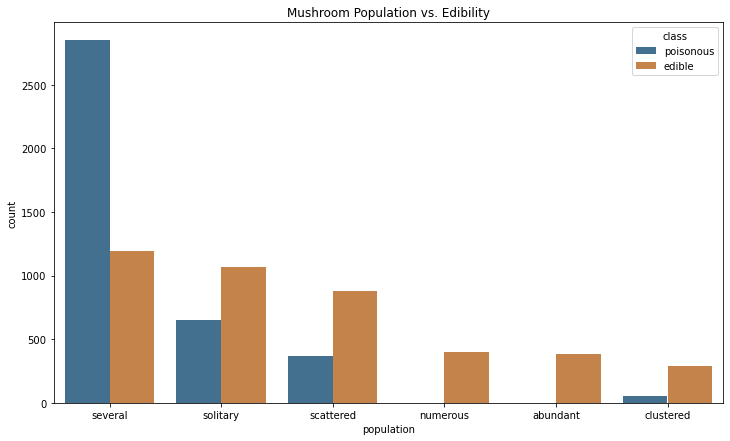

In [200]:
plt.figure(figsize=(12,7))
odor_class_plt = sns.countplot(x = 'population', data = data, hue = 'class', order = data['population'].value_counts().index, saturation = 0.5).set(title = "Mushroom Population vs. Edibility")

In [201]:
data = data[["class", "cap-color", "odor", "gill-color", "population", "habitat"]]

In [202]:
data

,class,cap-color,odor,gill-color,population,habitat
0,poisonous,brown,pungent,black,scattered,urban
1,edible,yellow,almond,black,numerous,grasses
2,edible,white,anise,brown,numerous,meadows
3,poisonous,white,pungent,brown,scattered,urban
4,edible,gray,none,black,abundant,grasses
...,...,...,...,...,...,...
8119,edible,brown,none,yellow,clustered,leaves
8120,edible,brown,none,yellow,several,leaves
8121,edible,brown,none,brown,clustered,leaves
8122,poisonous,brown,fishy,buff,several,leaves


In [203]:
# Turn data from categorical to numerical data for model training. 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(data.iloc[1])
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])
#     label_encoder.fit(data[col])
#     data[col] = label_encoder.transform(data[col])
x = data.drop('class', axis = 1)
y = data["class"].values

print(data.iloc[1])

class           edible
cap-color       yellow
odor            almond
gill-color       black
population    numerous
habitat        grasses
Name: 1, dtype: object
class         0
cap-color     9
odor          0
gill-color    0
population    2
habitat       0
Name: 1, dtype: int32


In [204]:
# Split data to prepare for training with models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 100)
print(len(X_test))
print(len(y_test))

2031
2031


In [205]:
# After splitting our datasets, we must scale the data in accordance to the training data to keep training consistent 
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
scaled.fit(X_train)

X_train = scaled.transform(X_train)
X_test = scaled.transform(X_test)

In [206]:
print(X_train)
np.savetxt("data_csvs\X_train.csv", X_train)
np.savetxt("data_csvs\X_test.csv", X_test)
np.savetxt("data_csvs\y_train.csv", y_train)
np.savetxt("data_csvs\y_test.csv", y_test)

[[0.33333333 0.5        0.63636364 0.8        1.        ]
 [0.         0.5        0.18181818 0.8        0.5       ]
 [0.33333333 0.75       0.63636364 1.         1.        ]
 ...
 [0.         0.75       0.90909091 0.8        1.        ]
 [0.         0.5        0.18181818 0.8        1.        ]
 [0.         0.75       0.81818182 0.2        0.83333333]]


In [207]:
## We now want to save this scaling model to apply to input data
import joblib
joblib.dump(scaled, 'models\scaled.save')

['models\\scaled.save']

In [208]:
# Now that our data has successfully been scaled, we can now begin training ML models to our data. 

In [209]:
# MODEL 1: DECISION TREES AND RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [210]:
predictions = rfc.predict(X_test)

In [211]:
# Performance Analysis
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1044
           1       1.00      0.99      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1044    0]
 [   6  981]]


In [212]:
#MODEL 2: ANN VIA KERAS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [213]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [214]:
model = Sequential()

model.add(Dense(units=22,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [215]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=60,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/60
191/191 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5291 - val_loss: 0.6708 - val_accuracy: 0.6947
Epoch 2/60
191/191 [==============================] - 0s 967us/step - loss: 0.6664 - accuracy: 0.5902 - val_loss: 0.6280 - val_accuracy: 0.7484
Epoch 3/60
191/191 [==============================] - 0s 939us/step - loss: 0.6354 - accuracy: 0.6366 - val_loss: 0.5852 - val_accuracy: 0.7755
Epoch 4/60
191/191 [==============================] - 0s 952us/step - loss: 0.5996 - accuracy: 0.6788 - val_loss: 0.5464 - val_accuracy: 0.8035
Epoch 5/60
191/191 [==============================] - 0s 948us/step - loss: 0.5852 - accuracy: 0.6949 - val_loss: 0.5198 - val_accuracy: 0.8163
Epoch 6/60
191/191 [==============================] - 0s 974us/step - loss: 0.5629 - accuracy: 0.7228 - val_loss: 0.4989 - val_accuracy: 0.8208
Epoch 7/60
191/191 [==============================] - 0s 955us/step - loss: 0.5507 - accuracy: 0.7344 - val_loss: 0.4759 - val_accuracy: 0

191/191 [==============================] - 0s 984us/step - loss: 0.2803 - accuracy: 0.8966 - val_loss: 0.1392 - val_accuracy: 0.9626
Epoch 58/60
191/191 [==============================] - 0s 977us/step - loss: 0.2789 - accuracy: 0.8958 - val_loss: 0.1352 - val_accuracy: 0.9611
Epoch 59/60
191/191 [==============================] - 0s 971us/step - loss: 0.2816 - accuracy: 0.8932 - val_loss: 0.1371 - val_accuracy: 0.9621
Epoch 60/60
191/191 [==============================] - 0s 947us/step - loss: 0.2821 - accuracy: 0.9007 - val_loss: 0.1382 - val_accuracy: 0.9621


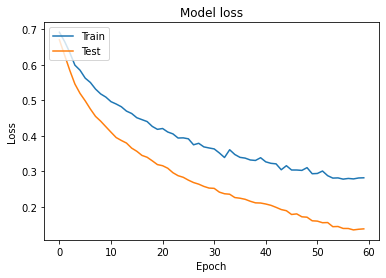

In [216]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [217]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

64/64 [==============================] - 0s 502us/step


In [218]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1044
           1       0.99      0.94      0.96       987

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

[[1030   14]
 [  63  924]]


In [219]:
# SAVING MODEL TO BE DEPLOYED
model.save('models\model.h5')
model_final = load_model('models\model.h5')